# ***20BRS1116 - ANIKET KUMAR PAUL***
# ***DATE - 19/01/2023***
# *LAB 6*

## Create a neural network model for the below given figures and display the summary

### 1. 
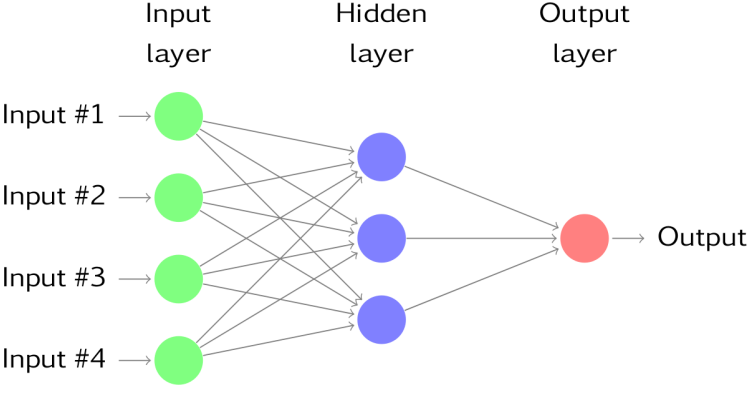

### Loading Data

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Other Data/Surgical-deepnet.csv")
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [ ]:
data.columns

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

In [ ]:
data.shape

(14635, 25)

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['bmi', 'Age', 'gender', 'baseline_cancer']]
Y = data['complication']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf

model = Sequential([
    Input(shape=(4,)),
    Flatten(),
    Dense(3, "relu"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=120)

Epoch 1/10
86/86 [==============================] - 2s 2ms/step - loss: 0.6691 - accuracy: 0.3104
Epoch 2/10
86/86 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.4123
Epoch 3/10
86/86 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.4897
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.5321
Epoch 5/10
86/86 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.7459
Epoch 6/10
86/86 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.7514
Epoch 7/10
86/86 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.7514
Epoch 8/10
86/86 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.7516
Epoch 9/10
86/86 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.7514
Epoch 10/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.7513


### Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

138/138 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.7575
Test Accuracy: 0.7574584484100342


### 2. 
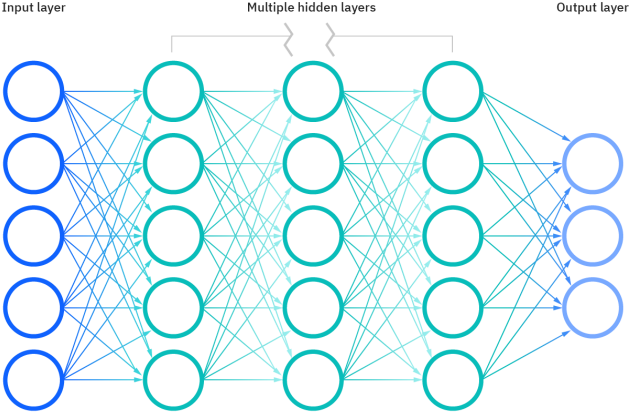

We can use a dataset that has output with 3 classification and apply the below model

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Sequential

model = Sequential([
    Input(shape=(5,)),
    Flatten(),
    Dense(5, "relu"),
    Dense(5, "relu"),
    Dense(5, "relu"),
    Dense(3, "sigmoid")
])
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


## Implement cross-entropy loss function for the previous model

Applying to model in Q1

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf

model = Sequential([
    Input(shape=(4,)),
    Flatten(),
    Dense(3, "relu"),
    Dense(1, "sigmoid")
])
model.compile(optimizer="adam", loss="CategoricalCrossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=120)

Epoch 1/10
86/86 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 2/10
86/86 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 3/10
86/86 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 5/10
86/86 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 6/10
86/86 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 7/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 8/10
86/86 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 9/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7457
Epoch 10/10
86/86 [==============================] - 0s 3ms/step - loss: 0.0000e+0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

138/138 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7529
Test Accuracy: 0.7529036402702332


## Implement a Leaky ReLU logic using network.py

### Network Module

In [ ]:
"""
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

import random
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]  # np.random.randn(y, 1) -> create an array of random nos. following normal distribution of 1 dimension or a y X 1 matrix
        self.weights = [np.random.randn(y, x) # y X x matrix
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = leaky_relu(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : Accuracy:{:2f}%".format(j,(self.evaluate(test_data)/n_test)*100))
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = leaky_relu(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * leaky_relu_derivative(zs[-1]) # activations is the predicted, y is the target
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = leaky_relu_derivative(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

### Leaky ReLU Functions

In [ ]:
# Miscellaneous functions

# Taking alpha as 100
alpha = 0.8

def leaky_relu(z):
    return np.where(z > 0, z, alpha*z)

# The Relu derivative for x is 1 when x > 0, 0 when x < 0, undefined or 0 when x == 0
def leaky_relu_derivative(z):
    return np.where(z > 0, 1, alpha)

### Loading mnist dataset

In [ ]:
# Library to load the mnist dataset

import pickle
import gzip
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Other Data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [ ]:
training_data, validation_data, test_data = load_data_wrapper()

### Training

In [ ]:
network = Network([784, 30, 10])
network.SGD(training_data, 10, 100, 1.5, test_data=test_data)

Epoch 0 : Accuracy:9.800000%
Epoch 1 : Accuracy:9.800000%
Epoch 2 : Accuracy:9.800000%
Epoch 3 : Accuracy:9.800000%
Epoch 4 : Accuracy:9.800000%
Epoch 5 : Accuracy:9.800000%
Epoch 6 : Accuracy:9.800000%
Epoch 7 : Accuracy:9.800000%
Epoch 8 : Accuracy:9.800000%
Epoch 9 : Accuracy:9.800000%


## Plot the gradient of each layer in the neural network you created (Sigmoid, ReLU) & interpret the results

Using the neural network of Q1

In [ ]:
import tensorflow as tf
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.BinaryCrossentropy()

def train_model(X, y, model, n_epochs=10, batch_size=32):
    "Run training loop manually"
    train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    gradhistory = []
    losshistory = []
    def recordweight():
        data = {}
        for g,w in zip(grads, model.trainable_weights):
            if '/kernel:' not in w.name:
                continue # skip bias
            name = w.name.split("/")[0]
            data[name] = g.numpy()
        gradhistory.append(data)
        losshistory.append(loss_value.numpy())
    for epoch in range(n_epochs):
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            if step == 0:
                recordweight()
    # After all epochs, record again
    recordweight()
    return gradhistory, losshistory

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def plot_gradient(gradhistory, losshistory):
    "Plot gradient mean and sd across epochs"
    fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(8, 12))
    ax[0].set_title("Mean gradient")
    for key in gradhistory[0]:
        ax[0].plot(range(len(gradhistory)), [w[key].mean() for w in gradhistory], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in gradhistory[0]:
        ax[1].semilogy(range(len(gradhistory)), [w[key].std() for w in gradhistory], label=key)
    ax[1].legend()
    ax[2].set_title("Loss")
    ax[2].plot(range(len(losshistory)), losshistory)
    plt.show()

### Using Sigmoid

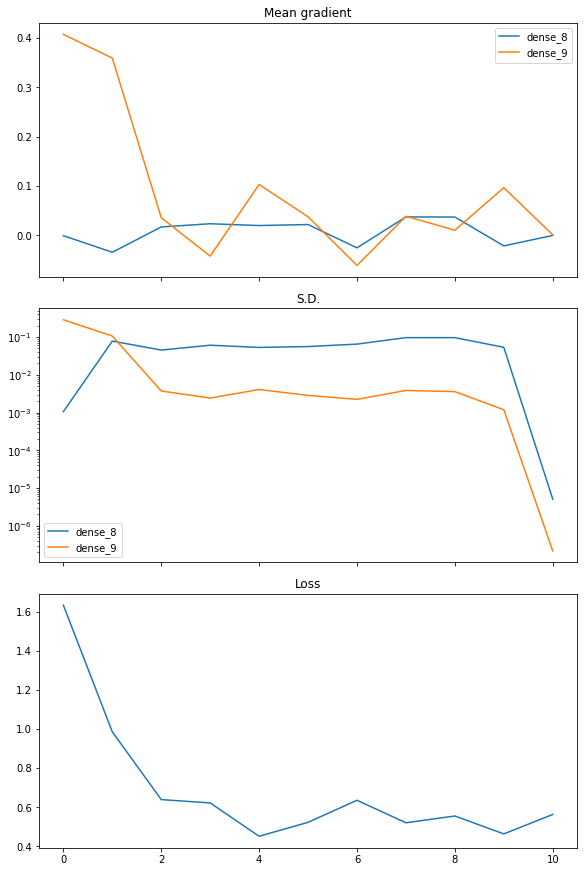

In [ ]:
model = Sequential([
    Input(shape=(4,)),
    Flatten(),
    Dense(3, "sigmoid"),
    Dense(1, "sigmoid")
])

gradhistory, losshistory = train_model(X_train, y_train, model)
plot_gradient(gradhistory, losshistory)

We can observe that the loss drops gradually and has deviations as the training progresses. At the end of 10 epochs, the loss is around 0.6, which is pretty high.

### Using ReLU

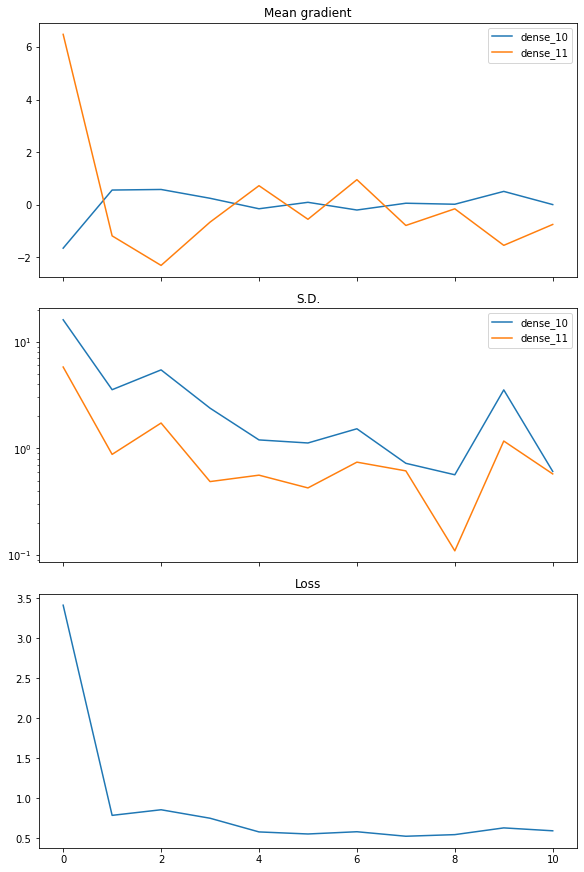

In [ ]:
model = Sequential([
    Input(shape=(4,)),
    Flatten(),
    Dense(3, "relu"),
    Dense(1, "sigmoid")
])

gradhistory, losshistory = train_model(X_train, y_train, model)
plot_gradient(gradhistory, losshistory)

Clearly, for relu, the drop is sudden and much more than sigmoid, the loss drops further too by a certain amount and at the end of 10 epochs the loss is around 0.5 which is lesser than that when we used sigmoid.